Left
O A O B O
O O O O O
O O O O O
O O O O O
O X O O O
Total Reward: 10


Left
O A O B O
O O O O O
O O O O O
O O O O O
O X O O O
Total Reward: 10


Right
O A O B O
O O O O O
O O O O O
O O O O O
O X O O O
Total Reward: 10


Up
O A O B O
O O O O O
O O O O O
O O O O O
O X O O O
Total Reward: 10




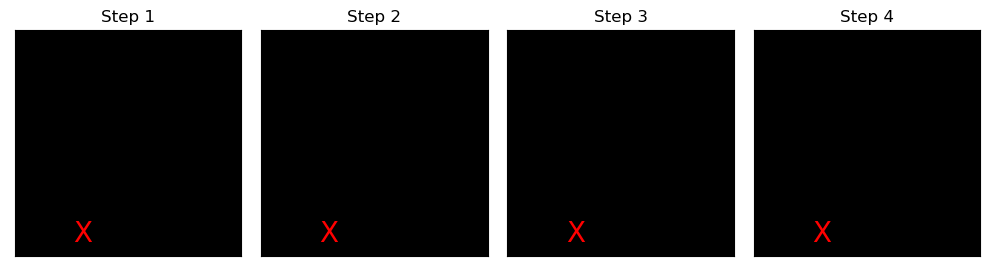

In [ ]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import matplotlib.pyplot as plt

class GridWorldEnv(gym.Env):
    def __init__(self):
        super(GridWorldEnv, self).__init__()

        # Define the grid size and the starting position
        self.grid_size = (5, 5)
        self.start_state = (0, 1)  # center
        self.state = self.start_state

        # action space: 0 - move_up, 1 move_right, 2 - move_down, 3 - move_left
        self.action_space = spaces.Discrete(4)

        # observation space: states as coordinates in the grid
        self.observation_space = spaces.Tuple((
            spaces.Discrete(self.grid_size[0]),
            spaces.Discrete(self.grid_size[1])
        ))

        # Set done as false, since we don't have a specific condition on when to terminate the program
        self.done = False
        
        # Get the reward for all the actions taken up until now
        self.total_reward = 0

    def reset(self, seed=None, options=None):
        """
        reset the environment to the start space. Prepares for a new episode.
        """
        self.state = self.start_state  # Set the state back to the start space as initiated in the __init__ function
        self.done = False  # Reset the "done" flag to false. Is not needed in this implementation, since done is always false. But could be useful for other implementations
        self.total_reward = 0  # Reset the accumulated reward to 0, since we want to reset everything.

        # returns the state and the dictionary with the information. Right now no information is given in the dictionary, but that could be changed later ...
        return self.state, {}

    def step(self, action):
        """
        executes a step. return the next state, the reward, the done flag (as false, like always), the truncated status (should also be false) and the info (which is empty right now)
        Führt eine Aktion aus und gibt die nächste Beobachtung, Belohnung, `done`-Status, `truncated`-Status und `info` zurück.
        """
        # Extrahiere die aktuelle Position
        y, x = self.state

        reward = 0
        # Berechne die gewünschte neue Position basierend auf der Aktion (0=oben, 1=rechts, 2=unten, 3=links)
        if action == 0:  # up
            print("Up")
            new_x, new_y = x, y - 1
        elif action == 1:  # right
            print("Right")
            new_x, new_y = x + 1, y
        elif action == 2:  # down
            print("Down")
            new_x, new_y = x, y + 1
        elif action == 3:  # left
            print("Left")
            new_x, new_y = x - 1, y
        else:
            raise ValueError("Ungültige Aktion.")

        # Prüfen, ob die neue Position innerhalb des Grids liegt
        if 0 <= new_x < self.grid_size[0] and 0 <= new_y < self.grid_size[1]:
            # Prüfen auf Sprünge bei Zielpositionen
            if self.state == (0, 1):  # A
                reward = 10
                self.state = (4, 1)  # Springt zur neuen Position
            elif self.state == (0, 3):  # B
                reward = 5
                self.state = (2, 3)  # Springt zur neuen Position
            else:
                reward = 0
        else:
            # Update des Zustands
            self.state = (new_x, new_y)
            
            # Wenn die Aktion versucht, das Grid zu verlassen, negative Belohnung
            reward = -1
        # Füge die Belohnung zur totalen Belohnung hinzu
        self.total_reward += reward

        # Abschlussbedingung (hier nur als Platzhalter, falls weitere Logik gewünscht ist)
        self.done = False

        # `truncated` auf False setzen, da keine spezifische Abbruchbedingung vorhanden
        truncated = False

        # Info-Dictionary
        info = {"total_reward": self.total_reward}

        # Rückgabe des Ergebnisses
        return self.state, reward, self.done, truncated, info

    def render(self, mode='human'):
        """
        Visualisiert den aktuellen Zustand der Umgebung.
        Wenn mode='human', wird der Zustand in der Konsole als Text ausgegeben.
        """
        # Erstelle ein leeres Grid mit 'O'
        grid = [["O" for _ in range(self.grid_size[1])] for _ in range(self.grid_size[0])]

        # Positioniere den Agenten im Grid
        x, y = self.state
        

        # Definiere spezielle Positionen
        grid[0][1] = "A"  # Ziel bei (1,0) mit Belohnung von 10
        grid[0][3] = "B"  # Ziel bei (3,0) mit Belohnung von 5

        grid[x][y] = "X"  # Setze das aktuelle Feld auf 'X'

        # Gebe das Grid in der Konsole aus
        print("\n".join([" ".join(row) for row in grid]))
        print(f"Total Reward: {self.total_reward}")  # Ausgabe der akkumulierten Belohnung
        print("\n")  # Leerzeile für bessere Lesbarkeit

# Registrierung der Umgebung
gym.envs.registration.register(
    id='GridWorld-v0',
    entry_point='__main__:GridWorldEnv',
)

if __name__ == "__main__":
    # Instanziere die Umgebung
    env = gym.make('GridWorld-v0')

    # Simuliere eine Episode
    state, _ = env.reset()  # Hier wird die geänderte reset-Methode verwendet
    frames = []  # Liste zur Speicherung der Frames für die Darstellung

    for _ in range(4):  # Führe 4 Schritte aus
        action = env.action_space.sample()  # Zufällige Aktion auswählen
        next_state, reward, done, truncated, info = env.step(action)  # Schritt ausführen
        env.render()  # Zustand rendern
        
        # Zugriff auf den Zustand der zugrunde liegenden Umgebung
        frames.append(env.unwrapped.state)  # Speichere den aktuellen Zustand als Frame

    # Optional: Plotten der Frames
    plt.figure(figsize=(10, 5))
    for i, frame in enumerate(frames):
        plt.subplot(1, 4, i + 1)
        plt.imshow(np.zeros((5, 5)), cmap='gray', vmin=0, vmax=2)
        plt.title(f'Step {i + 1}')
        plt.xticks([]), plt.yticks([])
        plt.text(frame[1], frame[0], 'X', ha='center', va='center', fontsize=20, color='red')
    plt.tight_layout()
    plt.show()
